<a href="https://colab.research.google.com/github/AcTlm/Notebook_ML_IODAA_2022/blob/main/Classification_wine_quality_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSION 

#### METHODES : 

Travail attendu = regression 

Meilleures performances = Classification

Modèles à tester : 
 - regression lineaire 
 - regression polynomiale
 - Regression logistique 


### Inspi
- https://www.kaggle.com/code/ecedolen/classification-logistic-regression-wine-quality
- https://www.kaggle.com/code/abolarinbukola/logistic-regression-wine-quality-92
-https://www.kaggle.com/code/madhurisivalenka/basic-machine-learning-with-red-wine-quality-data
- Même si l'objectif est de faire de la régression ==> Compléter la classif avec un randomforest et SVC : https://www.kaggle.com/code/madhurisivalenka/basic-machine-learning-with-red-wine-quality-data

### Packages 

In [ ]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
import io
from sklearn.preprocessing import StandardScaler
import pandas as pd
from tensorflow.keras.layers import Activation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


### Importation des données 

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['winequalityN.csv']))

Saving winequalityN.csv to winequalityN (6).csv


In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Pré-traitement 

In [ ]:
df.isna().sum()/df.shape[0]*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [ ]:
"Pourcentage de lignes perdues en supprimant les NA : " + str((df.shape[0]-df.dropna(axis=0).shape[0])*100/df.shape[0])

'Pourcentage de lignes perdues en supprimant les NA : 0.5233184546713868'

On va remplir les valeurs manquantes avec les valeurs médianes par colonnes.

In [ ]:
df = df.fillna(df.median())

<ipython-input-77-a187aa03e3ee>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [ ]:
target = df["quality"]

target_NN = []
for i in df["quality"]: 
  if i > 5 : 
    target_NN.append("1")
  else : 
    target_NN.append("-1")

dataset = df.drop("quality", axis=1)

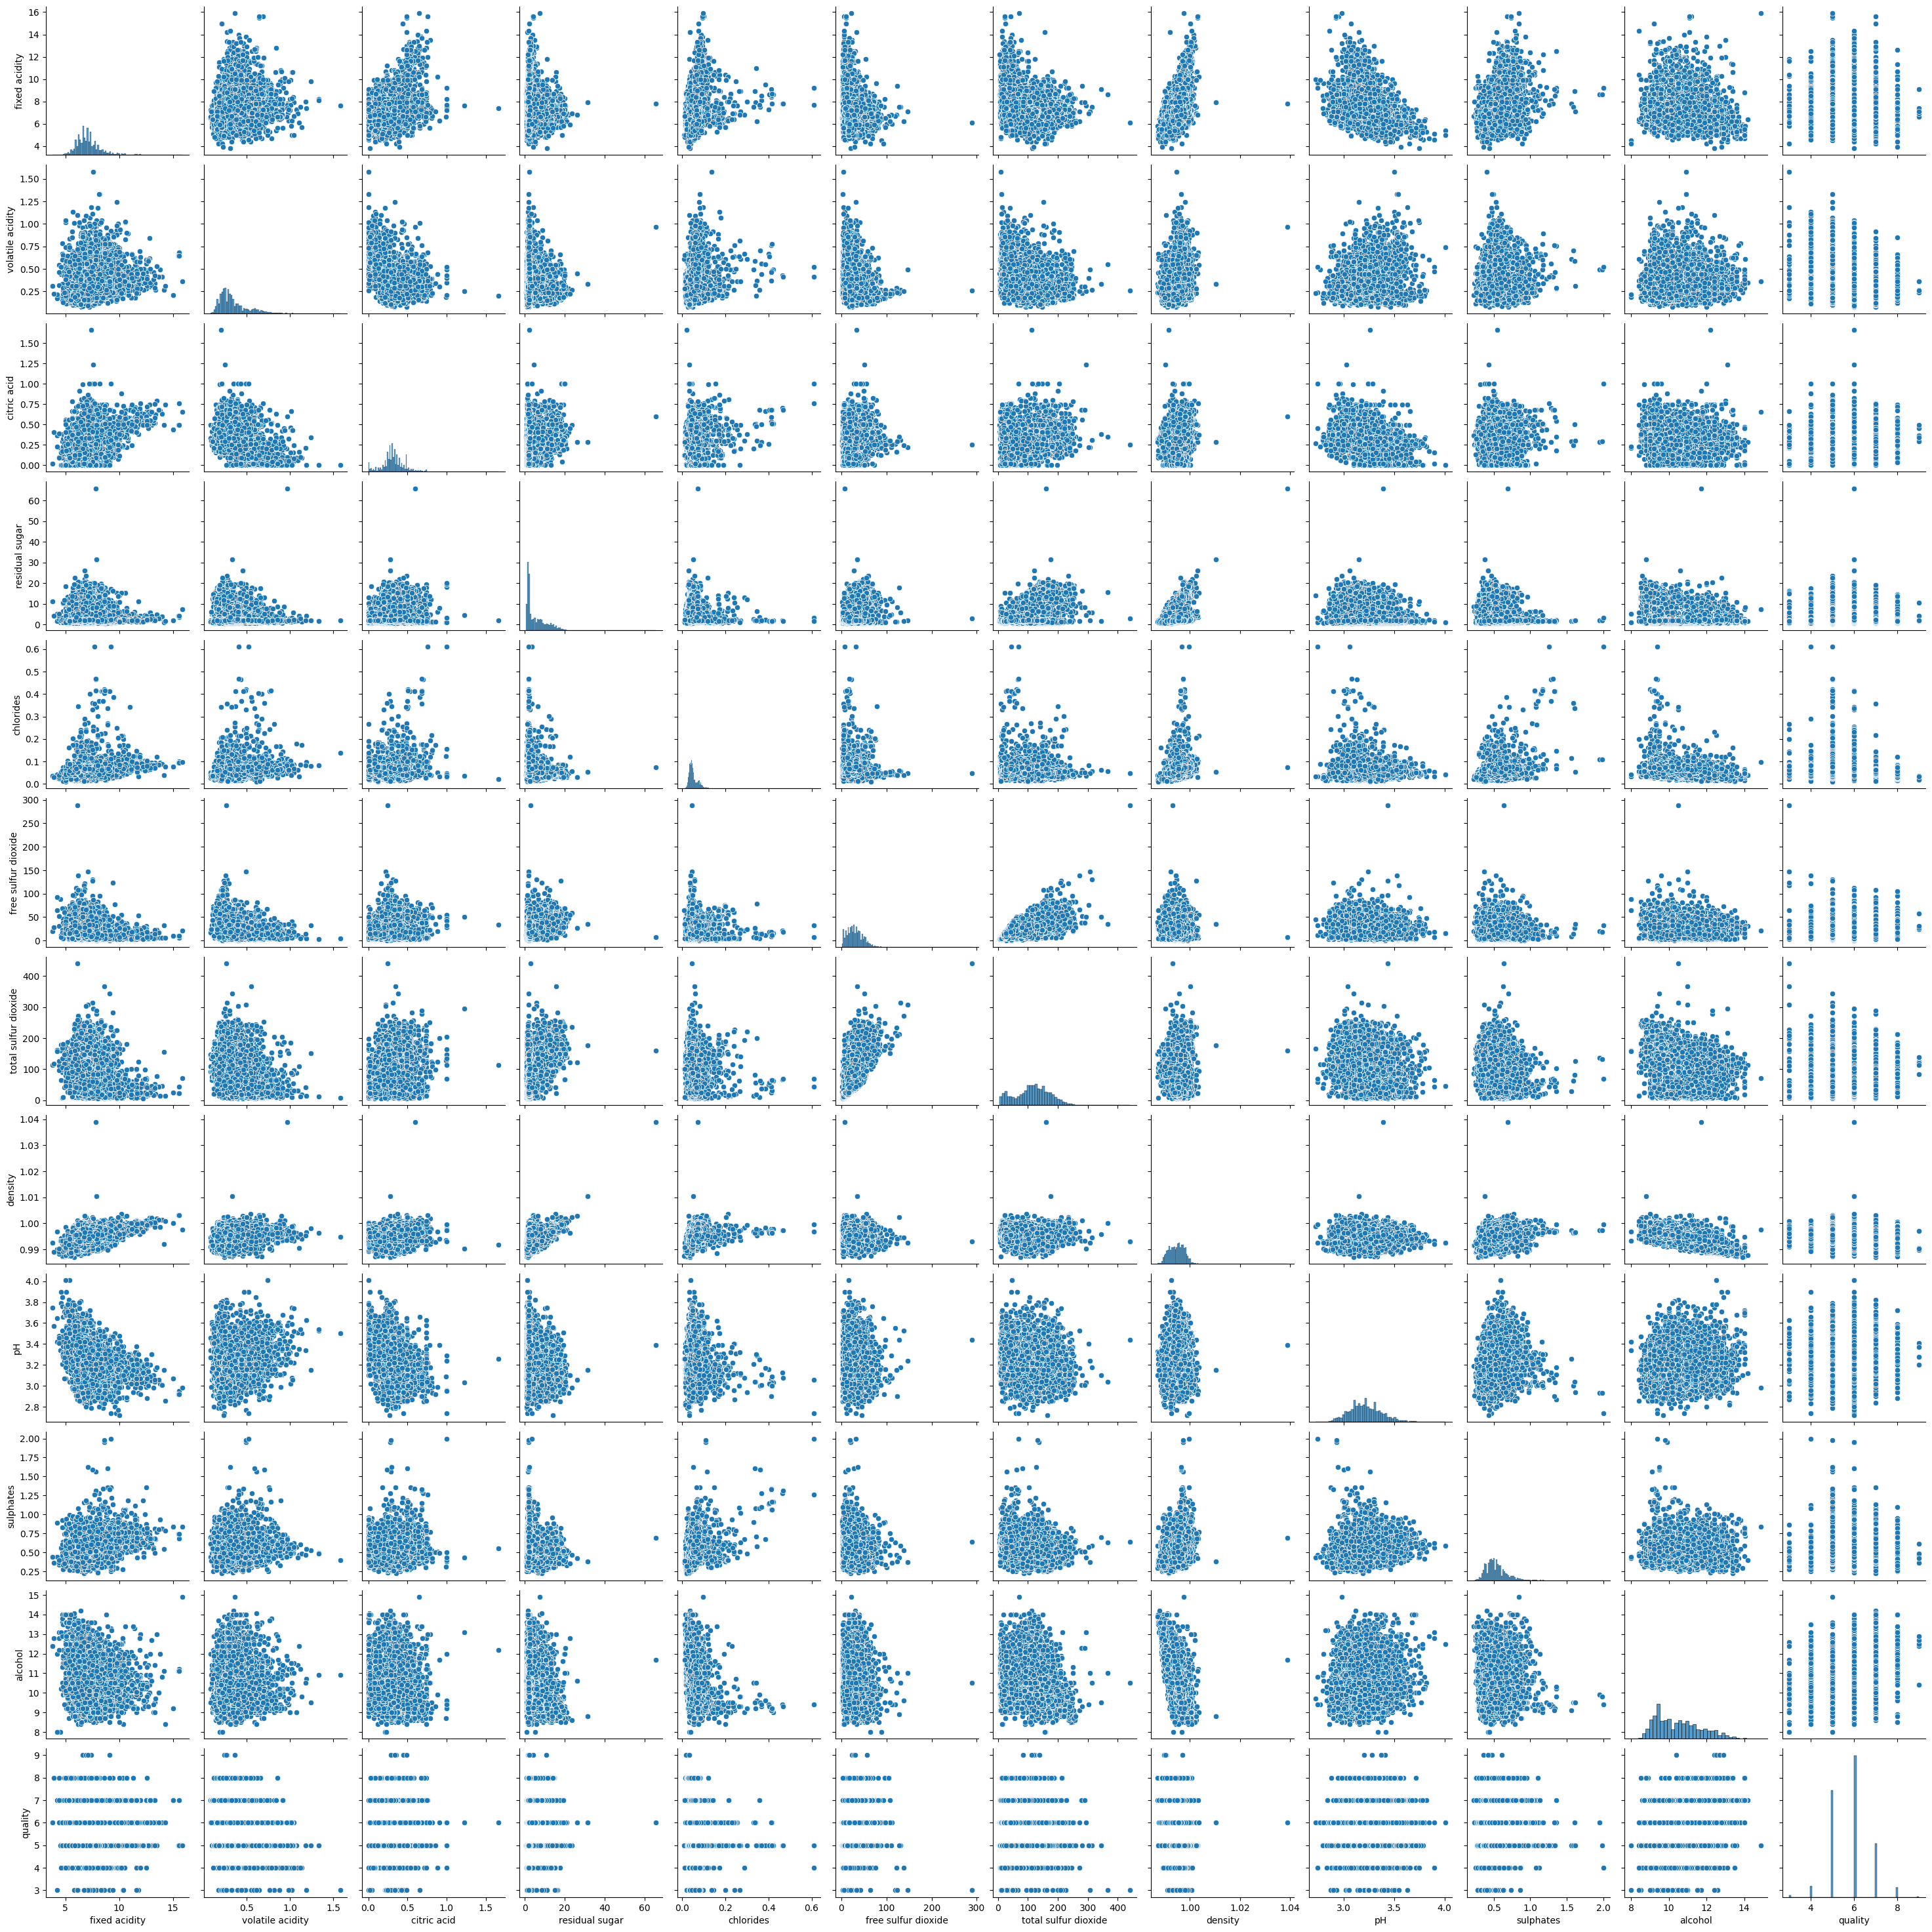

In [ ]:
sns.pairplot(df)

<ipython-input-38-e9b2f3ff6ab5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quality'])


<Axes: xlabel='quality', ylabel='Density'>

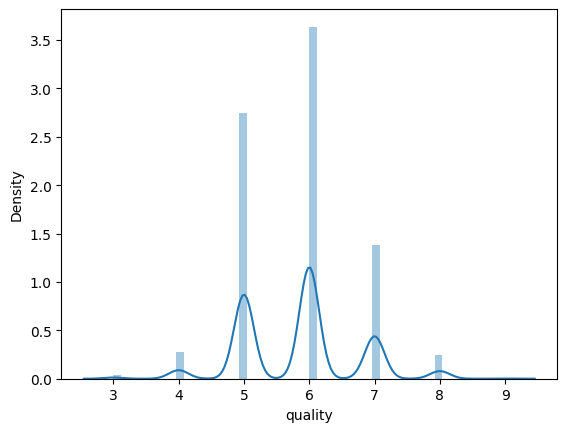

In [ ]:
sns.distplot(df['quality'])

<Axes: xlabel='density'>

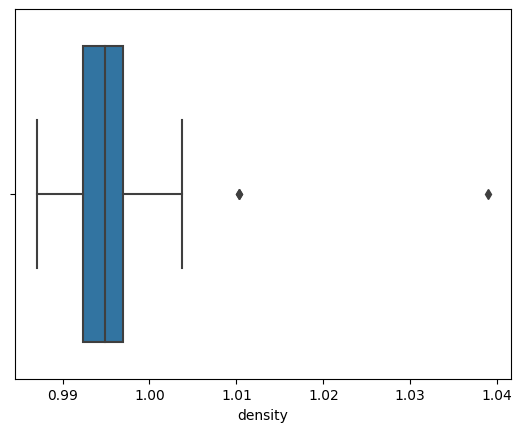

In [ ]:
sns.boxplot(data=df, x='density')

<Axes: >

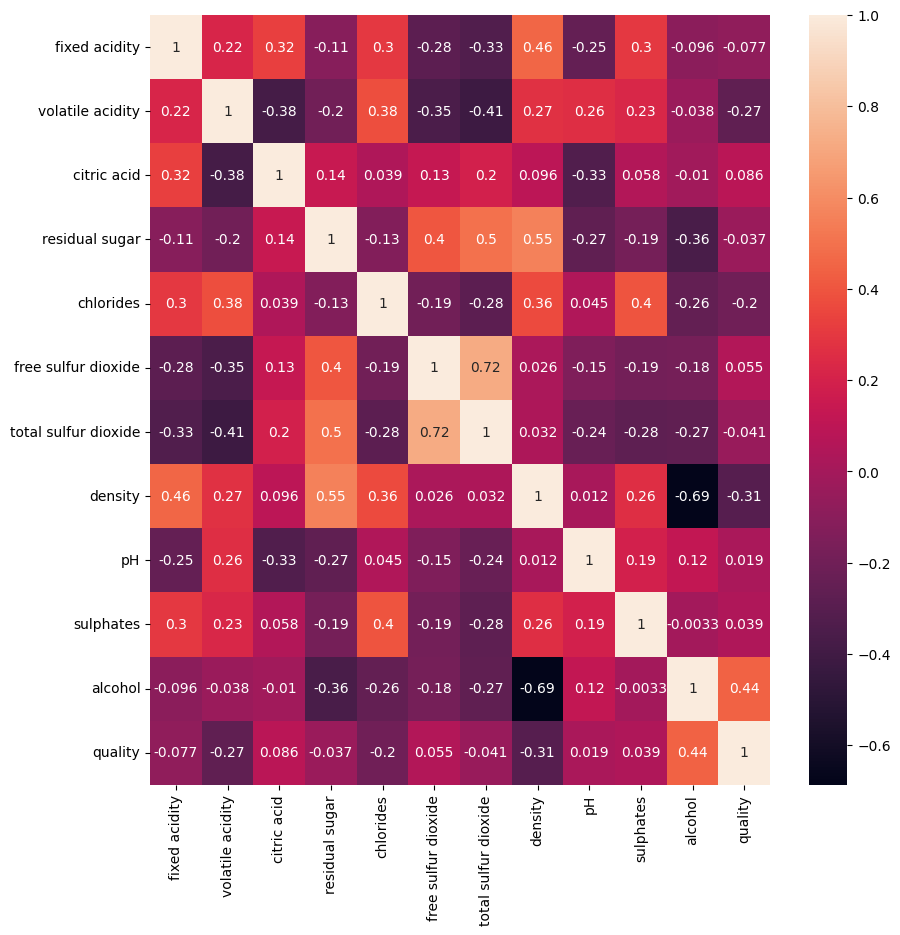

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## TRAINING POLYNOMIAL AND LINEAR REGRESSION 

### Split

In [ ]:
dataset = pd.get_dummies(dataset, "type")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3)

###  Regression polynomiale

In [ ]:
poly_reg_model = LinearRegression()

for deg in ([1,2,3,4,5]):
    pol_reg = PolynomialFeatures(degree = deg, include_bias=False)
    poly_features = pol_reg.fit_transform(X_train)
    poly_reg_model.fit(poly_features, y_train)
    X_test_poly = pol_reg.transform(X_test)
    print(poly_reg_model.score(X_test_poly, y_test))

0.306911115177108
0.2856374756767909
-0.6462737409252943
-24.236147372650407
-258891.62609374485


Les coefficients deviennent vite très mauvais, la régression polynomiale n'est pas une solution.

### Regression lineaire

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test, y_test))

0.306911115177104


In [ ]:
lm_predict = lm.predict(X_test)

In [ ]:
lm_predict = lm_predict.astype("int64")

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, lm_predict))
print('MSE:', metrics.mean_squared_error(y_test, lm_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predict)))

#print confusion matrix and accuracy score
lm_conf_matrix = confusion_matrix(y_test, lm_predict)
lm_acc_score = accuracy_score(y_test, lm_predict)
print(lm_conf_matrix)
print(lm_acc_score*100)

MAE: 0.6271794871794871
MSE: 0.8353846153846154
RMSE: 0.9139937720710221
[[  0   1   3   3   0   0   0]
 [  0  16  48   4   0   0   0]
 [  0  45 538  63   1   0   0]
 [  0  10 472 352   3   0   0]
 [  0   0  87 244   4   0   0]
 [  0   0  13  41   0   0   0]
 [  0   0   1   1   0   0   0]]
46.666666666666664


In [ ]:
print('Correlation: ', math.sqrt(lm.score(X_train,y_train)))

Correlation:  0.5399598695131979


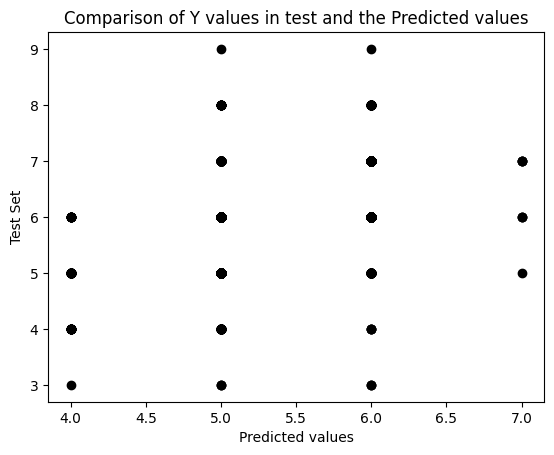

In [ ]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(lm_predict, y_test,  color='black')
plt.show()

## TRAINING LOGISTIC REGRESSION 

### SPLIT 

In [ ]:
# df_bins.type = df_bins.type.map({'white':0, 'red':1})

# X = df_bins[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
#        'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
#        'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']] 
# y = df_bins.quality_range

### TRAINING 

In [ ]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

In [ ]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.48
Accuracy in Test  Group   : 0.47


### Matrice de confusion

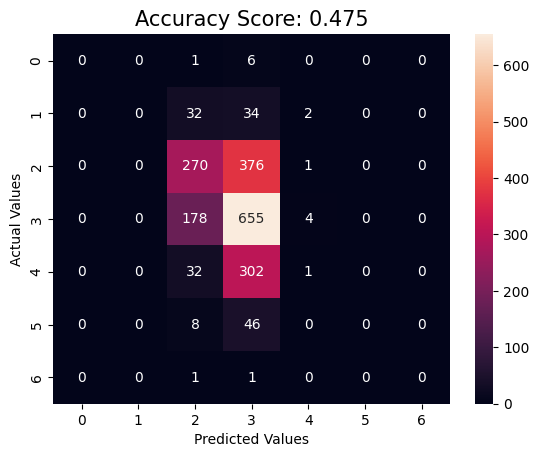

In [ ]:
predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

### Performances 


In [ ]:
confusion_matrix_test = confusion_matrix(y_test,predictions)

print('Confusion Matrix Test Data', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Test Data
----------------------------------------
[[  0   0   1   6   0   0   0]
 [  0   0  32  34   2   0   0]
 [  0   0 270 376   1   0   0]
 [  0   0 178 655   4   0   0]
 [  0   0  32 302   1   0   0]
 [  0   0   8  46   0   0   0]
 [  0   0   1   1   0   0   0]]


In [ ]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FP = confusion_matrix_test[0][1]
FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) Negative Positive   :", FP)
print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 0
(Total) True Positive       : 0
(Total) Negative Positive   : 0
(Total) Negative Negative   : 0


In [ ]:
### ACCURACY 
print("Accuracy Score of Our Model     : ",  test_accuracy)

Accuracy Score of Our Model     :  0.4748717948717949


In [ ]:
### Error Rate
Error_Rate = 1- (accuracy_score(y_test, predictions))  
Error_Rate

0.5251282051282051

In [ ]:
from sklearn.metrics import precision_score

### Precision
print("precision_score:",  precision_score(y_test, predictions, average='micro'))

precision_score: 0.4748717948717949


In [ ]:
from sklearn.metrics import recall_score

### Recall
print("recall_score: ",  recall_score(y_test, predictions, average='micro'))


recall_score:  0.4748717948717949


In [ ]:
### Specificity
print(" Specificity Score : ", (TN)/(TN + FP)) 

 Specificity Score :  nan


C:\Users\actou\AppData\Local\Temp\ipykernel_134268\3527046060.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  print(" Specificity Score : ", (TN)/(TN + FP))


In [ ]:
### F1 score
precision_s = precision_score(y_test, predictions,average='micro')
recall_s    = recall_score(y_test, predictions, average='micro')

print("F1_score : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))

F1_score :  0.4748717948717949


In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, f1_score

print(classification_report(y_test,predictions))

print("f1_score        : {:.2f}".format(f1_score(y_test, predictions, average='micro')))
print("recall_score    : {:.2f}".format(recall_score(y_test, predictions, average='micro')))
print("precision_score : {:.2f}".format(precision_score(y_test, predictions, average='micro')))

print('\n')
metrics =  precision_recall_fscore_support(y_test, predictions)
print("Precision       :" , metrics[0]) 
#print("Recall          :" , metrics[1]) 
print("F1 Score        :" , metrics[2]) 

              precision    recall  f1-score   support

           3       1.00      0.12      0.22         8
           4       0.00      0.00      0.00        70
           5       0.54      0.42      0.48       667
           6       0.46      0.78      0.58       818
           7       0.28      0.02      0.03       314
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00         1

    accuracy                           0.48      1939
   macro avg       0.33      0.19      0.19      1939
weighted avg       0.43      0.48      0.41      1939

f1_score        : 0.48
recall_score    : 0.48
precision_score : 0.48


Precision       : [1.         0.         0.54318618 0.45889921 0.27777778 0.
 0.        ]
F1 Score        : [0.22222222 0.         0.47643098 0.57916103 0.03012048 0.
 0.        ]


/Users/louisedry/mambaforge/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/louisedry/mambaforge/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/louisedry/mambaforge/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/louise

Tentative de log loss (à expliquer)

In [ ]:
y_train.describe()

Suite aux résultats peu performants obteneus par regression , nous avons fait le choix deux classer la qualité des vons rouges de manière binaire: Bon = quality > 5  , ou mauvais = quality < 5 

In [ ]:
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(dataset, target_NN, test_size=0.3)


In [ ]:
X_train_NN

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
3482,5.4,0.45,0.27,6.4,0.033,20.0,102.0,0.98944,3.22,0.27,13.4,0,1
6414,6.1,0.32,0.25,2.3,0.071,23.0,58.0,0.99633,3.42,0.97,10.6,1,0
4607,6.6,0.28,0.30,12.9,0.033,31.0,177.0,0.99479,3.12,0.39,11.2,0,1
5739,6.6,0.66,0.00,3.0,0.115,21.0,31.0,0.99629,3.45,0.63,10.3,1,0
4200,8.0,0.24,0.33,1.2,0.044,28.0,101.0,0.99035,3.03,0.43,12.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,7.6,0.35,0.47,13.3,0.037,42.0,116.0,0.99822,3.04,0.50,9.2,0,1
262,6.9,0.28,0.40,8.2,0.036,15.0,95.0,0.99440,3.17,0.33,10.2,0,1
4233,6.3,0.23,0.33,6.9,0.052,23.0,118.0,0.99380,3.23,0.46,10.4,0,1
3699,7.6,0.30,0.37,1.6,0.087,27.0,177.0,0.99438,3.09,0.50,9.8,0,1


## Classification with Multilayer Neural Network : good/bad wine

Trace: 
- 1 couche cachées , sigmoid, 8 noeuds.  = 0.76 d'accuracy en test
- 2 couches cachées , sigmoid, 8 noeuds.

Preprocess

In [ ]:
scaler = StandardScaler().fit(X_train_NN)
X_train = scaler.transform(X_train_NN)
X_test = scaler.transform(X_test_NN)
X_train = np.array(X_train)
y_train = np.array(y_train_NN)
y_test = np.array(y_test_NN)


print("shape de X_train :", X_train.shape)
print("shape de y_train :", y_train.shape)

shape de X_train : (4547, 13)
shape de y_train : (4547,)


In [ ]:
results_df = pd.DataFrame(columns=['fonction activation','NB couches cachées', 'nb noeud/couches', 'loss', 'accuracy'])

# Test architectures et fonction d'activation
f_activ = ['relu', 'sigmoid', 'tanh']
for f in f_activ :
    for hidden in range(1,4):
      for nodes in [8, 16, 32]:
        
          model = Sequential()
          model.add(Dense(nodes, activation=f, input_shape=(None, 1, 13)))
          for i in range(hidden-1):
              model.add(Dense(nodes, activation=f))
          model.add(Dense(1, activation=f))
          model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

          # Train the model
          history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)
          loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
          results_df = results_df.append({'fonction activation':f, 'NB couches cachées': n_hidden_layers, 'nb noeud/couches': n_nodes_per_layer,'loss': loss, 'accuracy': accuracy},   ignore_index=True)

In [102]:
results_df.sort_values(by="accuracy")


,fonction activation,NB couches cachées,nb noeud/couches,loss,accuracy
24,tanh,3,32,0.572078,0.729744
19,tanh,3,32,0.530729,0.738974
23,tanh,3,32,0.532842,0.739487
6,relu,3,32,0.738237,0.743590
14,sigmoid,3,32,0.514605,0.745128
15,sigmoid,3,32,0.509232,0.747180
2,relu,3,32,0.619184,0.748718
26,tanh,3,32,0.525746,0.749231
17,sigmoid,3,32,0.500414,0.749231
0,relu,3,32,0.627749,0.750769


In [ ]:
On conserve une architecture en 3 couches avec 32 noeuds par couche avec la fonction 'relu' comme fonction d'activation. On augmente le nombre d'époques de 20 à 50 puis 100 , 200 

Deep Neural Network

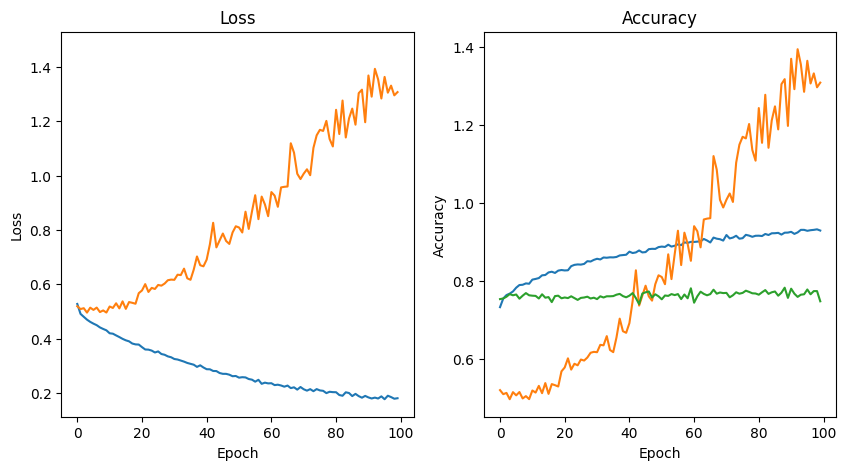

In [135]:
from ann_visualizer.visualize import ann_viz

model = Sequential()
model.add(Dense(int(float('32')), activation='relu', input_shape=(None, int(float('1')), int(float('13')))))
model.add(Dense(int(float('32')), activation='relu'))
model.add(Dense(int(float('32')), activation='relu'))
model.add(Dense(int(float('1')), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0,validation_data=(X_test, y_test))
loss_train = history.history['loss']
accuracy_train = history.history['accuracy']
loss_test = history.history['val_loss']
accuracy_test = history.history['val_accuracy']


# Plot loss and accuracy 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(loss_train , label='Training Loss')
axs[0].plot(loss_test, label='Test Loss')
axs[0].plot(loss)
axs[0].set_title('Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')

axs[1].plot(accuracy)
axs[1].plot(loss_test, label='Training Accuracy')
axs[1].plot(accuracy_test, label='Test Accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')

plt.show()

        

KeyError: ignored

In [129]:
y_pred = np.round(model.predict(X_test))
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f' % acc)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)


61/61 [==============================] - 0s 1ms/step
Train Accuracy: 0.936
Test Accuracy: 0.765


ANNEXE : TEST d'un réseau de neurone pour prédire la qualité du vin (Regression) --> donne des performances peu concluantes

In [ ]:
# paramètres testés
activations = ['relu', 'sigmoid', 'tanh']
architectures = [(64,), (128,), (64, 32), (128, 64)]
results = []

# Modèle
for activation in activations:
    for architecture in architectures:
        # Define your neural network model
        model = Sequential()
        model.add(Dense(architecture[0], input_shape=(13,)))
        if len(architecture) == 2:
            model.add(Dense(architecture[1]))
        model.add(Activation(activation))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

        train_acc = history.history['accuracy'][-1]
        val_acc = history.history['val_accuracy'][-1]
        train_loss = history.history['loss'][-1]
        val_loss = history.history['val_loss'][-1]
        results.append([activation, architecture, train_acc, val_acc, train_loss, val_loss])

columns = ['Activation', 'Architecture', 'Train Accuracy', 'Val Accuracy', 'Train Loss', 'Val Loss']
results_df = pd.DataFrame(results, columns=columns)
print(results_df)


Epoch 1/10
143/143 [==============================] - 2s 4ms/step - loss: -602.3898 - accuracy: 0.0000e+00 - val_loss: -1539.1326 - val_accuracy: 0.0000e+00
Epoch 2/10
143/143 [==============================] - 0s 3ms/step - loss: -3163.0249 - accuracy: 0.0000e+00 - val_loss: -5346.6533 - val_accuracy: 0.0000e+00
Epoch 3/10
143/143 [==============================] - 0s 2ms/step - loss: -8466.9150 - accuracy: 0.0000e+00 - val_loss: -12393.8701 - val_accuracy: 0.0000e+00
Epoch 4/10
143/143 [==============================] - 0s 2ms/step - loss: -17171.1074 - accuracy: 0.0000e+00 - val_loss: -22816.3770 - val_accuracy: 0.0000e+00
Epoch 5/10
143/143 [==============================] - 0s 3ms/step - loss: -29057.8242 - accuracy: 0.0000e+00 - val_loss: -36357.0859 - val_accuracy: 0.0000e+00
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: -44015.4375 - accuracy: 0.0000e+00 - val_loss: -52944.2500 - val_accuracy: 0.0000e+00
Epoch 7/10
143/143 [==========================